In [1]:
import numpy as np
import cv2
import glob
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

In [2]:
INPUT_DIR = '../images/captcha_images/color_captcha/'
OUTPUT_DIR = '../color_captcha_preprocessed/'

In [3]:
images_and_name = [(cv2.imread(file, cv2.IMREAD_GRAYSCALE), file) for file in glob.glob(INPUT_DIR + '*.jpg')]

In [4]:
# split images and names in seperate lists
images = [image for image, _ in images_and_name]
paths = [name for _, name in images_and_name]

# get name of images
names = []
for path in paths: names.append(path[-9:-4].upper())

In [5]:
def plot_images(images) -> None:
    fig = plt.figure(figsize=(15, 40))
    rows, columns = len(images)//2 + 1, 2
    for i, image in enumerate(images): 
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, i+1)
    
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(names[i])
        plt.imshow(image, cmap='gray')
    plt.show()

c:\Users\dhair\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


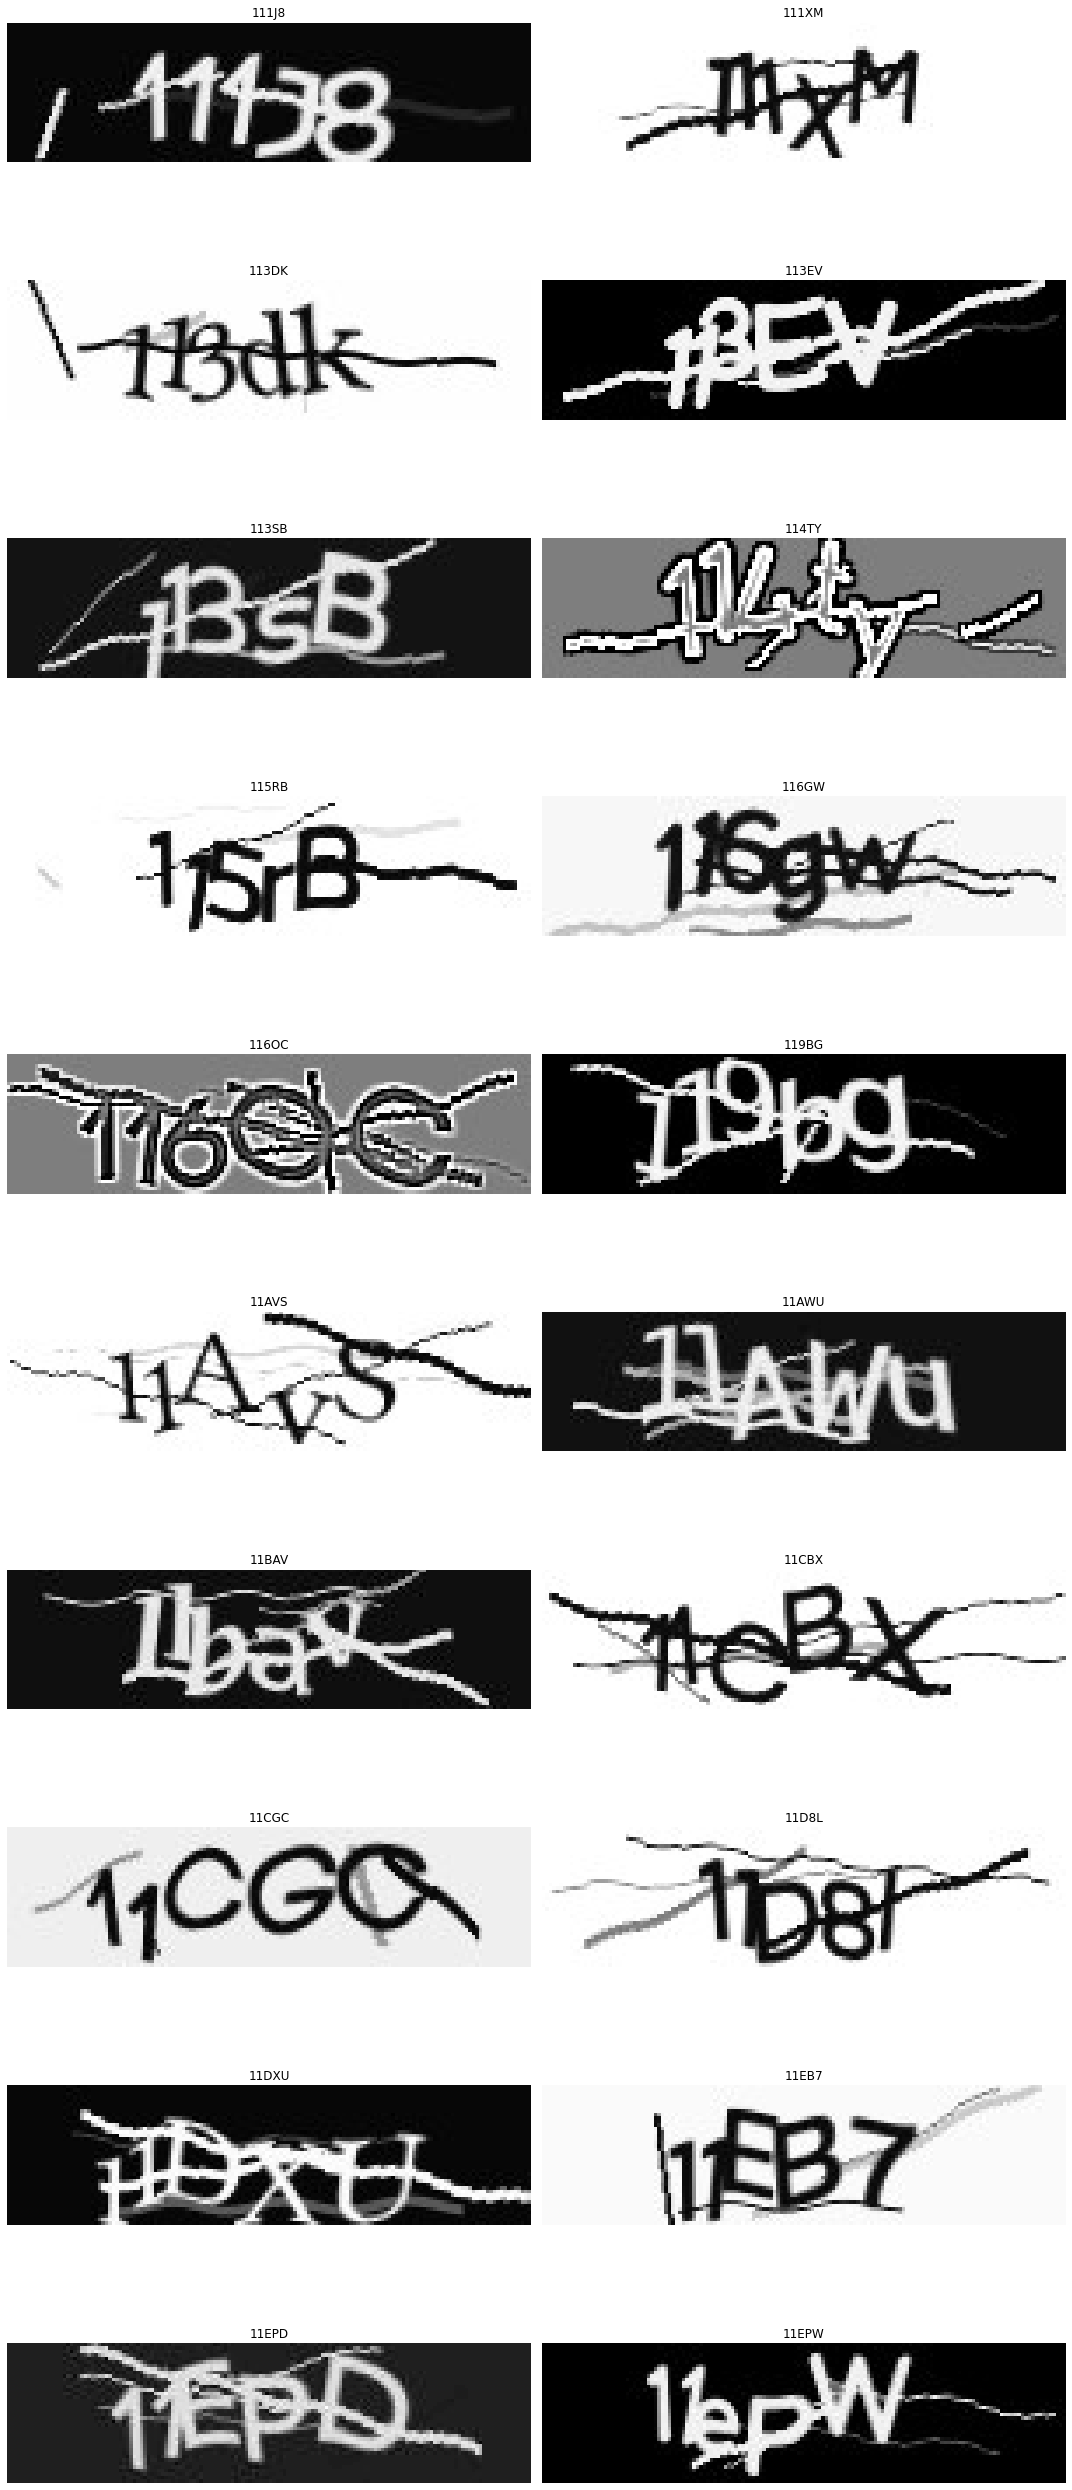

In [6]:
plot_images(images=images[:20])

In [7]:
def resize_image(image, scale_percent):	
	width = int(image.shape[1] * scale_percent / 100)
	height = int(image.shape[0] * scale_percent / 100)
	dim = (width, height)
	
	# resize image
	image_resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	return image_resized

In [8]:
def apply_filters(image):
    # binarize image
    (thresh, image_bin) = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)     
    length, width = len(image[0]),len(image)
    
    #invert image if black background
    if (cv2.countNonZero(image_bin) < (width*length)//2): image_bin = cv2.bitwise_not(image_bin)
    
    # resize 
    image_resized = resize_image(image_bin, 1000)
    
    # blur
    image_blur = cv2.GaussianBlur(image_bin, ksize=(3, 3),sigmaX=0)
    
    # median
    image_med = cv2.medianBlur(image_blur, ksize=3)
    
    # resize 
    image_resized = resize_image(image_med, 10)
    
    (thresh, image_bin) = cv2.threshold(image_resized, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
    
    return image_bin

In [9]:
# final_images = (apply_filters(image=image) for image in images[:10])
final_images = [apply_filters(image=image) for image in images]

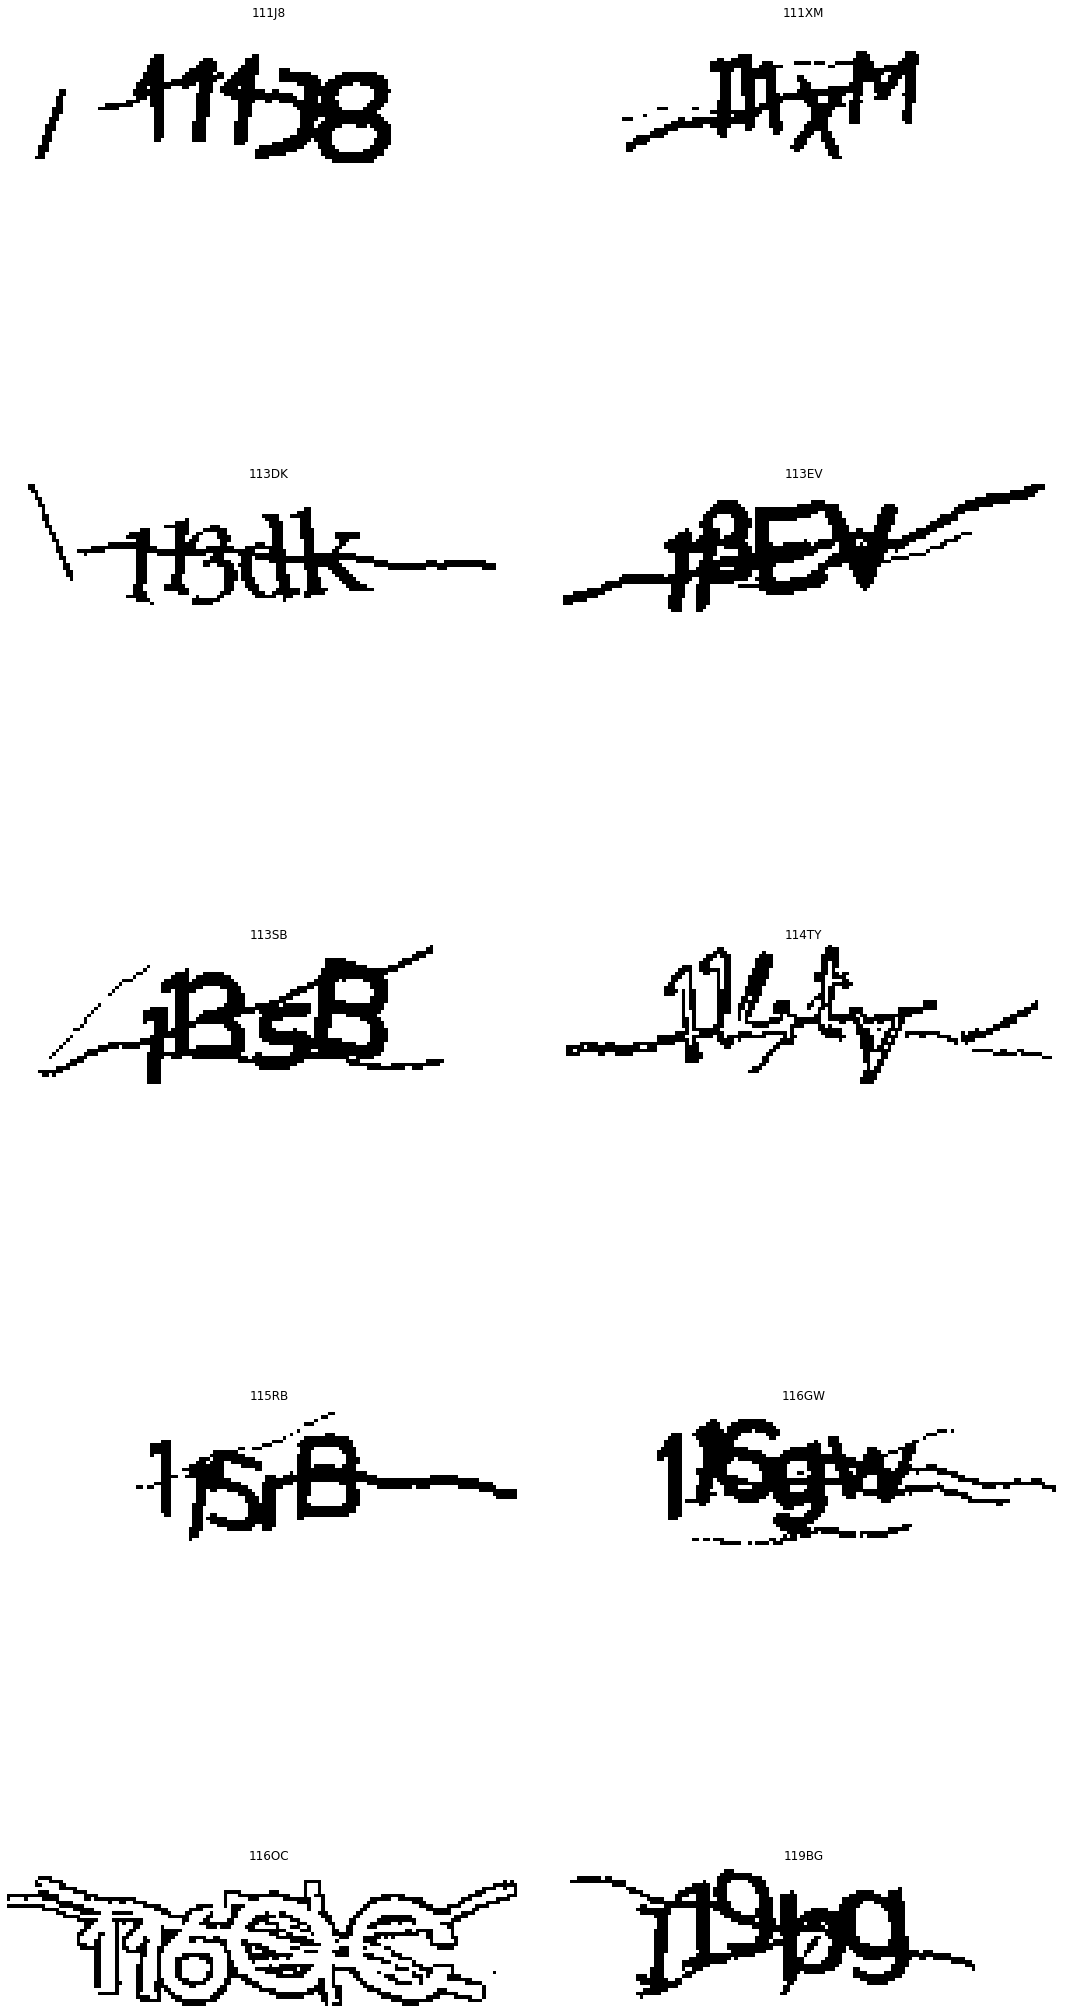

In [10]:
plot_images(images=final_images[:10])

In [11]:
os.chdir(OUTPUT_DIR)
os.listdir(OUTPUT_DIR)

[]

In [12]:
for i,image in enumerate(final_images): cv2.imwrite(names[i] + '.jpg', image)

In [13]:
len(os.listdir(OUTPUT_DIR))

113062